In [1]:
# Loading our EDA packages
import pandas as pd
import numpy as np

In [2]:
# Loading data viz packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\Softwares\DS\Project\Hepatitis\Original data\clean_data.csv")
df.head()

,Unnamed: 0,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,...,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,0,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1.0,85,18,4.0,35,1
1,1,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,35,1
2,2,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4.0,35,1
3,3,2,31,1,2,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4.0,80,1
4,4,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1.0,84,200,4.0,35,1


In [4]:
features_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue','spiders', 'ascites',
                   'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
                   'histology']]
labels = df['class']

In [5]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features_best = sc.fit_transform(features_best)

In [6]:
# Importing algorithms and essential metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
# Creating object of algorithms

LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=12, p=2)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', min_samples_leaf=2, random_state=2)


In [8]:
# KFold

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation = KFold(5)

In [9]:
# Computing accuracy using KFold

# Using Logistic

log1 = cross_val_score(LR, scaled_features_best, labels, cv = kfold_validation)
print(log1)
print(np.mean(log1))

# Using KNN

knn1 = cross_val_score(KNN, scaled_features_best, labels, cv = kfold_validation)
print(knn1)
print(np.mean(knn1))

# Using Random Forest

rf1 = cross_val_score(RF, scaled_features_best, labels, cv = kfold_validation)
print(rf1)
print(np.mean(rf1))


# (Since the dataset is imbalanced we can't go with accuracy score)

[0.90322581 0.90322581 0.90322581 0.70967742 0.77419355]
0.8387096774193548
[0.93548387 0.90322581 0.90322581 0.77419355 0.67741935]
0.8387096774193548
[0.93548387 0.90322581 0.80645161 0.70967742 0.80645161]
0.832258064516129


In [10]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(scaled_features_best, labels, random_state=26)

In [11]:
target_names = ['Die', 'Live']

In [12]:
# LR

LR.fit(X_train, y_train)
lr1pred = LR.predict(X_test)
print(confusion_matrix(y_test, lr1pred))

print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

from sklearn.metrics import classification_report 
print(classification_report(y_test, lr1pred, target_names=target_names))

[[ 8  2]
 [ 3 26]]
0.8706896551724138
0.8717948717948718
              precision    recall  f1-score   support

         Die       0.73      0.80      0.76        10
        Live       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39



In [13]:
# KNN

KNN.fit(X_train, y_train)
knn1pred = KNN.predict(X_test)
print(confusion_matrix(y_test, knn1pred))

print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

from sklearn.metrics import classification_report 
print(classification_report(y_test, knn1pred, target_names=target_names))

[[ 8  2]
 [ 2 27]]
0.853448275862069
0.8974358974358975
              precision    recall  f1-score   support

         Die       0.80      0.80      0.80        10
        Live       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



In [14]:
# RF

RF.fit(X_train, y_train)
rf1pred = RF.predict(X_test)
print(confusion_matrix(y_test, rf1pred))

print(RF.score(X_train, y_train))
print(RF.score(X_test, y_test))

from sklearn.metrics import classification_report 
print(classification_report(y_test, rf1pred, target_names=target_names))

[[ 8  2]
 [ 5 24]]
0.9827586206896551
0.8205128205128205
              precision    recall  f1-score   support

         Die       0.62      0.80      0.70        10
        Live       0.92      0.83      0.87        29

    accuracy                           0.82        39
   macro avg       0.77      0.81      0.78        39
weighted avg       0.84      0.82      0.83        39



In [15]:
# Plotting confusion matrix for KNN


#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(KNN, X_test, y_test)


In [16]:
# Handling imbalanced dataset using either Under Sampling or Over Sampling

In [17]:
from collections import Counter #to count the no. of labels

In [18]:
# Under Sampling

from imblearn.under_sampling import NearMiss
nm = NearMiss()
feature_under_sample, label_under_sample = nm.fit_resample(scaled_features_best, labels)

print("No. of classes before under sampling {}".format(Counter(labels)))
print("No. of classes after under sampling {}".format(Counter(label_under_sample)))


No. of classes before under sampling Counter({2: 123, 1: 32})
No. of classes after under sampling Counter({1: 32, 2: 32})


In [19]:
# Computing accuracy using KFold for Under Sampling data
kfold_validation = KFold(7)

# Using Logistic

log2 = cross_val_score(LR, feature_under_sample, label_under_sample, cv = kfold_validation)
print(log2)
print(np.mean(log2))

# Using KNN

knn2 = cross_val_score(KNN, feature_under_sample, label_under_sample, cv = kfold_validation)
print(knn2)
print(np.mean(knn2))

# Using Random Forest

rf2 = cross_val_score(RF, feature_under_sample, label_under_sample, cv = kfold_validation)
print(rf2)
print(np.mean(rf2))


[0.4        0.66666667 0.77777778 0.44444444 0.88888889 0.55555556
 0.66666667]
0.6285714285714287
[0.3        0.55555556 0.66666667 0.55555556 0.77777778 0.55555556
 0.77777778]
0.5984126984126983
[0.4        0.44444444 0.77777778 0.66666667 0.44444444 0.55555556
 0.77777778]
0.5809523809523809


In [20]:
# Building model for Under sampling technique

Xunder_train, Xunder_test, yunder_train, yunder_test = train_test_split(feature_under_sample, label_under_sample, test_size=0.3, random_state=42) 


In [21]:
# LR for Under Sampling technique

LR.fit(Xunder_train, yunder_train)
lr2pred = LR.predict(Xunder_test)
print(confusion_matrix(yunder_test, lr2pred))

print(LR.score(Xunder_train, yunder_train))
print(LR.score(Xunder_test, yunder_test))

from sklearn.metrics import classification_report 
print(classification_report(yunder_test, lr2pred, target_names=target_names))

[[4 6]
 [2 8]]
0.9318181818181818
0.6
              precision    recall  f1-score   support

         Die       0.67      0.40      0.50        10
        Live       0.57      0.80      0.67        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20



In [22]:
# KNN for Under Sampling technique

KNN.fit(Xunder_train, yunder_train)
knn2pred = KNN.predict(Xunder_test)
print(confusion_matrix(yunder_test, knn2pred))

print(KNN.score(Xunder_train, yunder_train))
print(KNN.score(Xunder_test, yunder_test))

from sklearn.metrics import classification_report 
print(classification_report(yunder_test, knn2pred, target_names=target_names))

[[5 5]
 [1 9]]
0.8409090909090909
0.7
              precision    recall  f1-score   support

         Die       0.83      0.50      0.62        10
        Live       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



In [23]:
# RF for Under Sampling technique

RF.fit(Xunder_train, yunder_train)
rf2pred = RF.predict(Xunder_test)
print(confusion_matrix(yunder_test, rf2pred))

print(RF.score(Xunder_train, yunder_train))
print(RF.score(Xunder_test, yunder_test))

from sklearn.metrics import classification_report 
print(classification_report(yunder_test, rf2pred, target_names=target_names))

[[6 4]
 [1 9]]
0.9772727272727273
0.75
              precision    recall  f1-score   support

         Die       0.86      0.60      0.71        10
        Live       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20



In [24]:
# Over Sampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
feature_over_sample, label_over_sample = ros.fit_resample(scaled_features_best, labels)

print("No. of classes before over sampling {}".format(Counter(labels)))
print("No. of classes after over sampling {}".format(Counter(label_over_sample)))


No. of classes before over sampling Counter({2: 123, 1: 32})
No. of classes after over sampling Counter({2: 123, 1: 123})


In [25]:
# Computing accuracy using KFold for Over Sampling data
kfold_validation = KFold(7)

# Using Logistic

log3 = cross_val_score(LR, feature_over_sample, label_over_sample, cv = kfold_validation)
print(log3)
print(np.mean(log3))

# Using KNN

knn3 = cross_val_score(KNN, feature_over_sample, label_over_sample, cv = kfold_validation)
print(knn3)
print(np.mean(knn3))

# Using Random Forest

rf3 = cross_val_score(RF, feature_over_sample, label_over_sample, cv = kfold_validation)
print(rf3)
print(np.mean(rf1))


[0.88888889 0.85714286 0.8        0.65714286 0.8        0.8
 0.88571429]
0.8126984126984126
[0.83333333 0.85714286 0.77142857 0.65714286 0.77142857 0.85714286
 0.88571429]
0.8047619047619047
[0.91666667 0.85714286 0.88571429 0.71428571 0.97142857 0.91428571
 1.        ]
0.832258064516129


In [26]:
# Building model for Over sampling technique

Xover_train, Xover_test, yover_train, yover_test = train_test_split(feature_over_sample, label_over_sample, test_size=0.3, random_state=42) 


In [27]:
# LR for Over Sampling technique

LR.fit(Xover_train, yover_train)
lr3pred = LR.predict(Xover_test)
print(confusion_matrix(yover_test, lr3pred))

print(LR.score(Xover_train, yover_train))
print(LR.score(Xover_test, yover_test))

from sklearn.metrics import classification_report 
print(classification_report(yover_test, lr3pred, target_names=target_names))

[[35  6]
 [ 6 27]]
0.8546511627906976
0.8378378378378378
              precision    recall  f1-score   support

         Die       0.85      0.85      0.85        41
        Live       0.82      0.82      0.82        33

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [28]:
# KNN for Over Sampling technique

KNN.fit(Xover_train, yover_train)
knn3pred = KNN.predict(Xover_test)
print(confusion_matrix(yover_test, knn3pred))

print(KNN.score(Xover_train, yover_train))
print(KNN.score(Xover_test, yover_test))

from sklearn.metrics import classification_report 
print(classification_report(yover_test, knn3pred, target_names=target_names))

[[33  8]
 [ 6 27]]
0.8255813953488372
0.8108108108108109
              precision    recall  f1-score   support

         Die       0.85      0.80      0.83        41
        Live       0.77      0.82      0.79        33

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [29]:
# RF for Over Sampling technique

RF.fit(Xover_train, yover_train)
rf3pred = RF.predict(Xover_test)
print(confusion_matrix(yover_test, rf3pred))

print(RF.score(Xover_train, yover_train))
print(RF.score(Xover_test, yover_test))

from sklearn.metrics import classification_report 
print(classification_report(yover_test, rf3pred, target_names=target_names))

[[40  1]
 [ 4 29]]
0.9941860465116279
0.9324324324324325
              precision    recall  f1-score   support

         Die       0.91      0.98      0.94        41
        Live       0.97      0.88      0.92        33

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



In [30]:
# Getting features and labels from OverSampling technique so that I can further get a separate balanced data out of it

In [31]:
rffeature_over_sample, rflabel_over_sample = ros.fit_resample(features_best, labels)


In [32]:
# Using RF now to again check the accuracy cause earlier we did check but it was on Scaled Features.
# Since RF is a ensemble technique and also its said that ensemble techniques doesn't require scaling hence building
# different model altogether for RF

In [33]:
X_rftrain,X_rftest, y_rftrain,y_rftest = train_test_split(rffeature_over_sample, rflabel_over_sample, test_size=0.3, random_state=26)

In [34]:
# Computing accuracy using KFold for Over Sampling data WITHOUT Feature Scaling technique

# Using Random Forest

rf4 = cross_val_score(RF, rffeature_over_sample, rflabel_over_sample, cv = kfold_validation)
print(rf4)
print(np.mean(rf4))


[0.91666667 0.85714286 0.91428571 0.77142857 0.91428571 0.97142857
 1.        ]
0.9064625850340136


In [35]:
# RF for Over Sampling technique WITHOUT Feature Scaling technique 

RF.fit(X_rftrain, y_rftrain)
rf4pred = RF.predict(X_rftest)
print(confusion_matrix(y_rftest, rf4pred))

print(RF.score(X_rftrain, y_rftrain))
print(RF.score(X_rftest, y_rftest))

from sklearn.metrics import classification_report 
print(classification_report(y_rftest, rf4pred, target_names=target_names))

[[42  2]
 [ 3 27]]
0.9883720930232558
0.9324324324324325
              precision    recall  f1-score   support

         Die       0.93      0.95      0.94        44
        Live       0.93      0.90      0.92        30

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


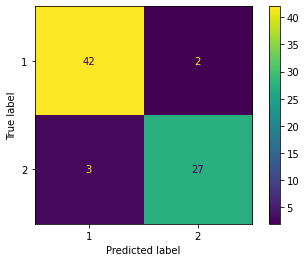

In [36]:
# Plotting confusion matrix for RF


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_rftest, y_rftest)


In [37]:
# TN = 43
# TP = 26
# FN = 4
# FP = 1

In [80]:
# Using Joblib to save the RF model

import joblib
model_file_RF = open("Random_Forest_Model.pkl", 'wb')
joblib.dump(RF, model_file_RF)
model_file_RF.close()

In [81]:
# balanced_data = pd.concat([rffeature_over_sample, rflabel_over_sample], axis='columns') 
# balanced_data.head()


,age,sex,steroid,antivirals,fatigue,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,2,1,2,2,2,2,2,1.0,85,18,4.0,35,1,2
1,50,1,1,2,1,2,2,2,0.9,135,42,3.5,35,1,2
2,78,1,2,2,1,2,2,2,0.7,96,32,4.0,35,1,2
3,31,1,2,1,2,2,2,2,0.7,46,52,4.0,80,1,2
4,34,1,2,2,2,2,2,2,1.0,84,200,4.0,35,1,2


In [82]:
#balanced_data.shape

(246, 15)

In [83]:
#balanced_data.to_csv("D:/Softwares/DS/Project/Hepatitis/Original data/balanced_data.csv")